<a href="https://colab.research.google.com/github/Bike2091/MyProject/blob/main/%E0%B9%82%E0%B8%84%E0%B8%A3%E0%B8%87%E0%B8%87%E0%B8%B2%E0%B8%99_%E0%B8%81%E0%B8%A5%E0%B8%B8%E0%B9%88%E0%B8%A16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare Data

In [ ]:
# ดาวน์โหลดไฟล์ excel การส่งออกของปี 2563 - 2565 จาก google drive
!gdown --id 1rqq6r-WM23zAfttis2kKtLv0ZroElM1b

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rqq6r-WM23zAfttis2kKtLv0ZroElM1b
To: /content/opendata-export2563-2565.zip
100% 85.5M/85.5M [00:03<00:00, 23.9MB/s]


In [ ]:
# unzip ไฟล์ที่ดาวน์โหลด
!unzip opendata-export2563-2565.zip

Archive:  opendata-export2563-2565.zip
  inflating: opendata-export2563-msme.xlsx  
  inflating: opendata-export2564new-msme-06062565.xlsx  
  inflating: opendata-export2565new-msme-jan-dec.xlsx  


In [ ]:
# สร้าง dataframe การส่งออกของปี 2563
df_2563 = pd.read_excel('opendata-export2563-msme.xlsx')
df_2563.rename(columns = {'HS 2dg':'HS_2dg', 'HS 4dg':'HS_4dg'}, inplace = True)

In [ ]:
# สร้าง dataframe การส่งออกของปี 2564
df_2564 = pd.read_excel('opendata-export2564new-msme-06062565.xlsx')

In [ ]:
# สร้าง dataframe การส่งออกของปี 2565
df_2565 = pd.read_excel('opendata-export2565new-msme-jan-dec.xlsx')

In [ ]:
# เพิ่มข้อมูลอัตราแลกเปลี่ยนในแต่ละปีลงใน dataframe (1 บาท ต่อ ดอลลาร์สหรัฐ)
exchange_rate2563 = [0.033, 0.0319, 0.0318, 0.0303, 0.031, 0.0317, 0.0321, 0.032, 0.0318, 0.0317, 0.0326, 0.0331]
exchange_rate2564 = [0.033, 0.0332, 0.0327, 0.0319, 0.0322, 0.032, 0.0311, 0.0299, 0.0308, 0.0292, 0.0301, 0.0295]
exchange_rate2565 = [0.0298, 0.0303, 0.0306, 0.0298, 0.0291, 0.0292, 0.0281, 0.028, 0.0273, 0.0266, 0.0268, 0.0288]

df_2563['exchange_rate'] = df_2563['Month'].apply(lambda x: exchange_rate2563[x - 1])
df_2564['exchange_rate'] = df_2564['Month'].apply(lambda x: exchange_rate2564[x - 1])
df_2565['exchange_rate'] = df_2565['Month'].apply(lambda x: exchange_rate2565[x - 1])

In [ ]:
# สร้าง dataframe การส่งออกของปี 2563 - 2565 จาก data ที่ผ่านการ cleaned แล้ว
df_3year = pd.concat([df_2563, df_2564, df_2565],  ignore_index=True)
df_3year

,Country,HS_2dg,คำอธิบาย-HS 2dg,HS_4dg,คำอธิบาย-HS 4dg,Value_Baht,Value_USD,Business_size,Month,Year,exchange_rate
0,UNITED ARAB EMIRATES,1,สัตว์มีชีวิต,106,สัตว์มีชีวิตอื่น ๆ,155055,5166,NaN,12,2563,0.0331
1,UNITED ARAB EMIRATES,2,เนื้อสัตว์และส่วนอื่นของสัตว์ที่บริโภคได้,203,เนื้อสุกร สด แช่เย็น หรือแช่เย็นจนแข็ง,104049,3466,L,12,2563,0.0331
2,UNITED ARAB EMIRATES,2,เนื้อสัตว์และส่วนอื่นของสัตว์ที่บริโภคได้,207,เนื้อและส่วนอื่นที่บริโภคได้ของสัตว์ปีกเลี้ยงต...,349,11,L,8,2563,0.0320
3,UNITED ARAB EMIRATES,2,เนื้อสัตว์และส่วนอื่นของสัตว์ที่บริโภคได้,207,เนื้อและส่วนอื่นที่บริโภคได้ของสัตว์ปีกเลี้ยงต...,358915,11597,L,11,2563,0.0326
4,UNITED ARAB EMIRATES,2,เนื้อสัตว์และส่วนอื่นของสัตว์ที่บริโภคได้,207,เนื้อและส่วนอื่นที่บริโภคได้ของสัตว์ปีกเลี้ยงต...,1937321,64543,L,12,2563,0.0331
...,...,...,...,...,...,...,...,...,...,...,...
1705152,รหัสประเทศสำหรับเขตต่อเนื่องฯ,27,เชื้อเพลิงที่ได้จากแร่ น้ำมันแร่ และผลิตภัณฑ์ท...,2710,น้ำมันปิโตรเลียมและน้ำมันที่ได้จากแร่บิทูมินัส...,186730380,5615529,L,4,2565,0.0298
1705153,รหัสประเทศสำหรับเขตต่อเนื่องฯ,27,เชื้อเพลิงที่ได้จากแร่ น้ำมันแร่ และผลิตภัณฑ์ท...,2710,น้ำมันปิโตรเลียมและน้ำมันที่ได้จากแร่บิทูมินัส...,639577770,19195702,L,1,2565,0.0298
1705154,รหัสประเทศสำหรับเขตต่อเนื่องฯ,27,เชื้อเพลิงที่ได้จากแร่ น้ำมันแร่ และผลิตภัณฑ์ท...,2710,น้ำมันปิโตรเลียมและน้ำมันที่ได้จากแร่บิทูมินัส...,635778465,19369081,L,2,2565,0.0303
1705155,รหัสประเทศสำหรับเขตต่อเนื่องฯ,27,เชื้อเพลิงที่ได้จากแร่ น้ำมันแร่ และผลิตภัณฑ์ท...,2710,น้ำมันปิโตรเลียมและน้ำมันที่ได้จากแร่บิทูมินัส...,185260965,5531334,L,5,2565,0.0291


In [ ]:
df_3year.describe()

# Clean Data

In [ ]:
# drop column ที่ไม่ต้องการใช้ออก
df_3year = df_3year.drop(['HS_4dg', 'คำอธิบาย-HS 4dg', 'Value_USD'], axis=1)

In [ ]:
# dataframe ของข้อมูลที่มีขนาดของธุรกิจเป็น null
bs_null = df_3year[df_3year.Business_size.isnull()]
bs_null

,Country,HS_2dg,คำอธิบาย-HS 2dg,Value_Baht,Business_size,Month,Year,exchange_rate
0,UNITED ARAB EMIRATES,1,สัตว์มีชีวิต,155055,NaN,12,2563,0.0331
51,UNITED ARAB EMIRATES,1,สัตว์มีชีวิต,80824,NaN,1,2563,0.0330
52,UNITED ARAB EMIRATES,1,สัตว์มีชีวิต,90444,NaN,2,2563,0.0319
53,UNITED ARAB EMIRATES,1,สัตว์มีชีวิต,92841,NaN,3,2563,0.0318
56,UNITED ARAB EMIRATES,1,สัตว์มีชีวิต,99306,NaN,1,2563,0.0330
...,...,...,...,...,...,...,...,...
1704730,ZAMBIA,6,ต้นไม้ และพืชอื่นๆ ที่มีชีวิต หัว รากและสิ่งที...,106052,NaN,12,2565,0.0288
1704848,ZAMBIA,62,เครื่องแต่งกายและของที่ใช้ประกอบกับเครื่องแต่ง...,13225,NaN,12,2565,0.0288
1704849,ZAMBIA,62,เครื่องแต่งกายและของที่ใช้ประกอบกับเครื่องแต่ง...,12642,NaN,6,2565,0.0292
1704850,ZAMBIA,62,เครื่องแต่งกายและของที่ใช้ประกอบกับเครื่องแต่ง...,94214,NaN,3,2565,0.0306


In [ ]:
print("จำนวนแถวที่มีขนาดของธุรกิจเป็น null มีทั้งหมด {} แถว".format(len(bs_null)))

จำนวนแถวที่มีขนาดของธุรกิจเป็น null มีทั้งหมด 117539 แถว


In [ ]:
# เปลี่ยนข้อมูลใน Column 'Business_size' ที่เป็น NaN ให้เป็น String เปล่า ''
df_3year.fillna('', inplace=True)

In [ ]:
# สร้าง Array ของ Business_size และ Value
arr_size = np.array(df_3year.Business_size)
arr_value = np.array(df_3year.Value_Baht)

In [ ]:
# ทำการเปลี่ยน String เปล่าของ Column 'Business_size' ให้เป็นธุรกิจขนาดต่างๆ ตามเกณฑ์จำแนกของขนาดธุรกิจ น้อยกว่า 1.8 ล้าน เป็น 'Micro', ไม่เกิน 100 ล้าน เป็น 'S', ไม่เกิน 500 ล้าน เป็น 'M', มากกว่า 500 ล้าน เป็น 'L'
df_3year['Business_size'] = np.where(np.logical_and(arr_size == '', arr_value <= 1800000), "Micro",
                   np.where(np.logical_and(arr_size == '', np.logical_and(arr_value > 1800000, arr_value <= 100000000)), "S",
                   np.where(np.logical_and(arr_size == '', np.logical_and(arr_value > 100000000, arr_value <= 500000000)), "M",
                   np.where(np.logical_and(arr_size == '', arr_value > 500000000), "L", arr_size))))


In [ ]:
# ทำการเช็คว่ายังมี Business size เป็นมีค่าเป็น NaN อีกหรือไม่
df_3year[df_3year.Business_size.isnull()]

,Country,HS_2dg,คำอธิบาย-HS 2dg,Value_Baht,Business_size,Month,Year,exchange_rate


In [ ]:
# เปลี่ยน type ของ column ต่างๆ
df_3year = df_3year.astype({'HS_2dg' : 'object', 'Year' : 'object', 'Month' : 'object'})

# EDA

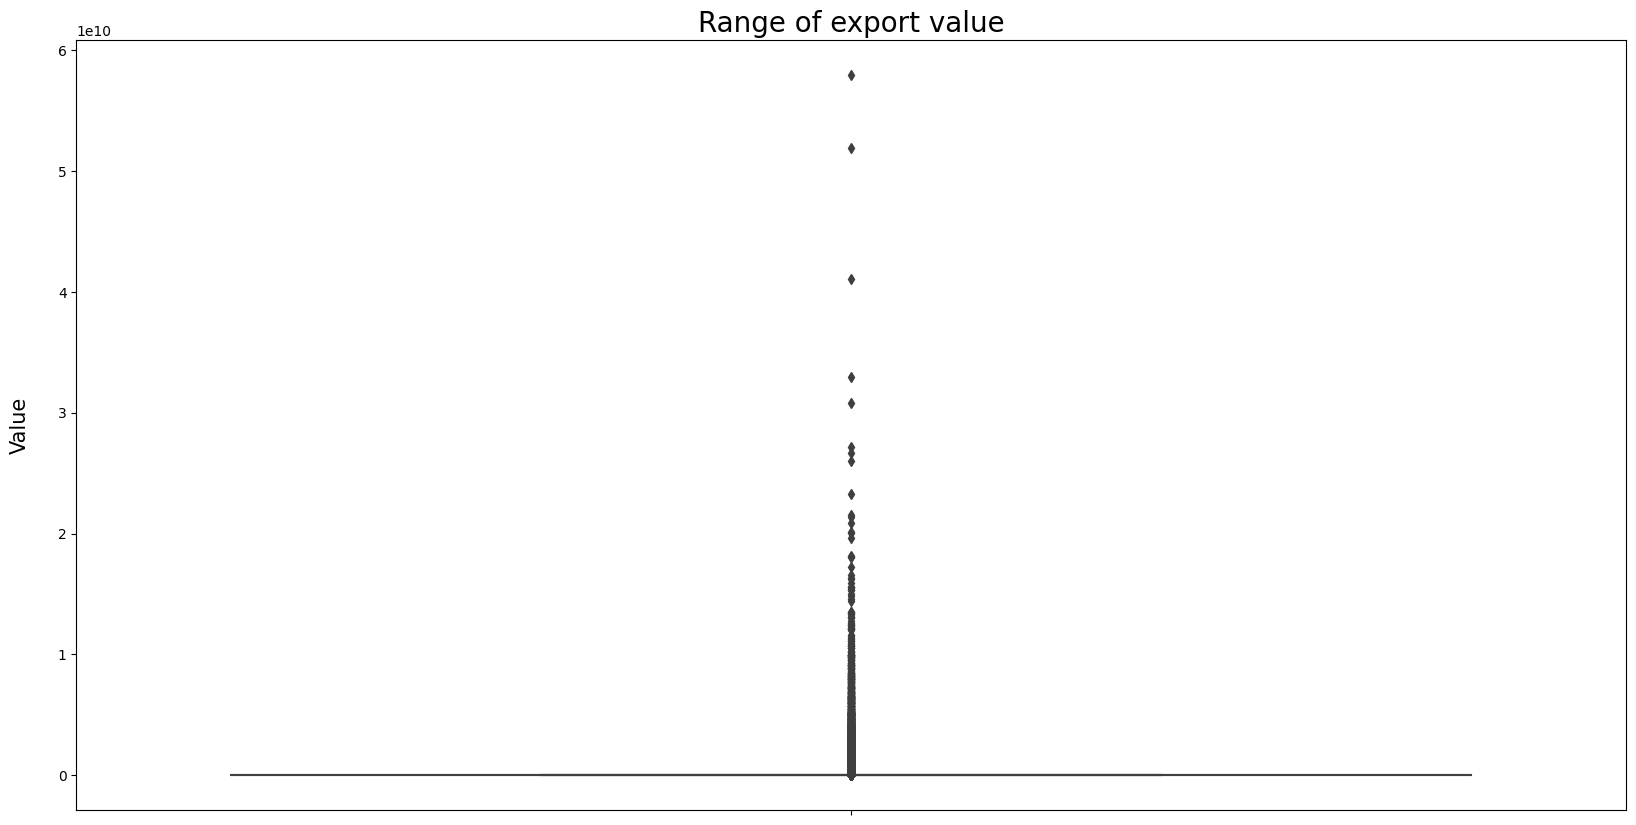

In [ ]:
# ใช้ box plot เพื่อตรวจหา outliers ของมูลค่าการส่งออก
plt.figure(figsize=(20,10))
sns.boxplot(y=df_3year['Value_Baht']);
plt.title("Range of export value", fontsize=20)
plt.ylabel('Value', fontsize=15, labelpad=20);

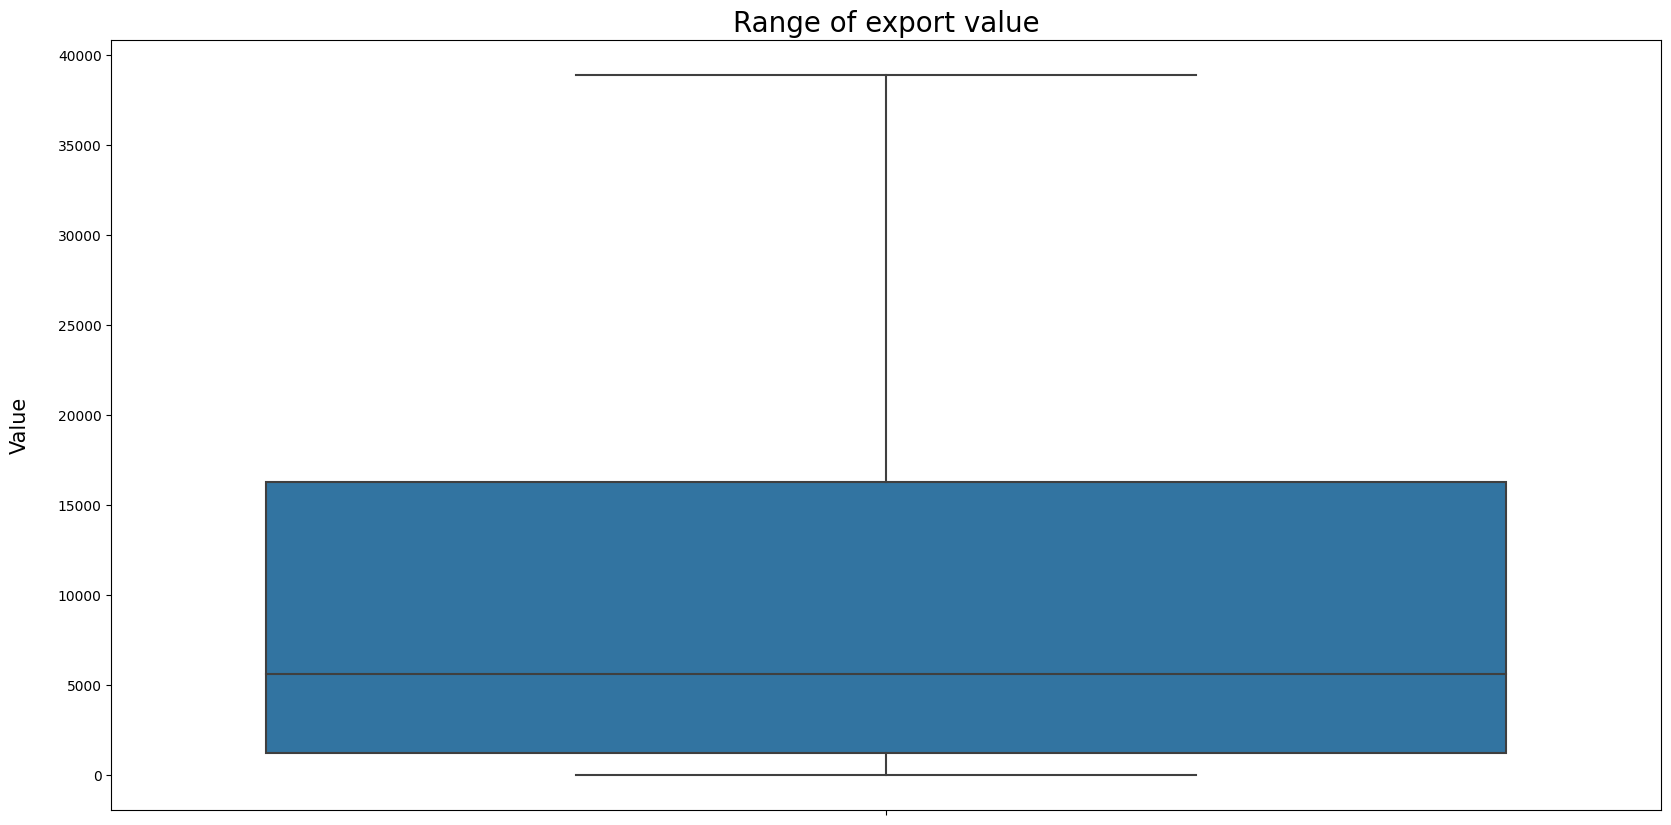

In [ ]:
# box plot แสดงช่วงของมูลค่าในการส่งออก ที่นำ outliers ออกแล้ว
plt.figure(figsize=(20,10))
sns.boxplot(y=df_3year.query("Value_Baht < 38889")['Value_Baht']);
plt.title("Range of export value", fontsize=20)
plt.ylabel('Value', fontsize=15, labelpad=20);

In [ ]:
# ทำการเอา outlier ออก โดยเลือกมูลค่าส่งออกที่น้อยกว่า 38889 บาท
df_3year = df_3year.query("Value_Baht < 38889")
df_3year

,Country,HS_2dg,คำอธิบาย-HS 2dg,Value_Baht,Business_size,Month,Year,exchange_rate
2,UNITED ARAB EMIRATES,2,เนื้อสัตว์และส่วนอื่นของสัตว์ที่บริโภคได้,349,L,8,2563,0.0320
7,UNITED ARAB EMIRATES,3,ปลา สัตว์น้ำจำพวกครัสตาเซีย โมลลุสก์ และสัตว์น...,32725,M,3,2563,0.0318
11,UNITED ARAB EMIRATES,3,ปลา สัตว์น้ำจำพวกครัสตาเซีย โมลลุสก์ และสัตว์น...,19179,Micro,1,2563,0.0330
12,UNITED ARAB EMIRATES,3,ปลา สัตว์น้ำจำพวกครัสตาเซีย โมลลุสก์ และสัตว์น...,20106,Micro,2,2563,0.0319
14,UNITED ARAB EMIRATES,3,ปลา สัตว์น้ำจำพวกครัสตาเซีย โมลลุสก์ และสัตว์น...,12703,Micro,10,2563,0.0317
...,...,...,...,...,...,...,...,...
1705090,ZIMBABWE,85,เครื่องจักรไฟฟ้า เครื่องอุปกรณ์ไฟฟ้า และส่วนปร...,3302,M,9,2565,0.0273
1705137,ZIMBABWE,87,ยานบกนอกจากรถที่เดินบนรางรถไฟหรือรางรถราง ส่วน...,24680,Micro,1,2565,0.0298
1705149,ZIMBABWE,90,อุปกรณ์และเครื่องอุปกรณ์ที่ใช้ในทางทัศนศาสตร์ ...,1495,L,11,2565,0.0268
1705150,ZIMBABWE,95,ของเล่น ของเล่นเกม และของใช้ที่จำเป็นในการเล่น...,9650,L,1,2565,0.0298


<ipython-input-26-6dbfddf7cfb3>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)
<ipython-input-26-6dbfddf7cfb3>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 1)
<ipython-input-26-6dbfddf7cfb3>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 2)


(array([69054., 23024., 15433., 11708.,  9635.,  8189.,  7112.,  6511.,
         5672.,  5365.]),
 array([    0. ,  3888.8,  7777.6, 11666.4, 15555.2, 19444. , 23332.8,
        27221.6, 31110.4, 34999.2, 38888. ]),
 <BarContainer object of 10 artists>)

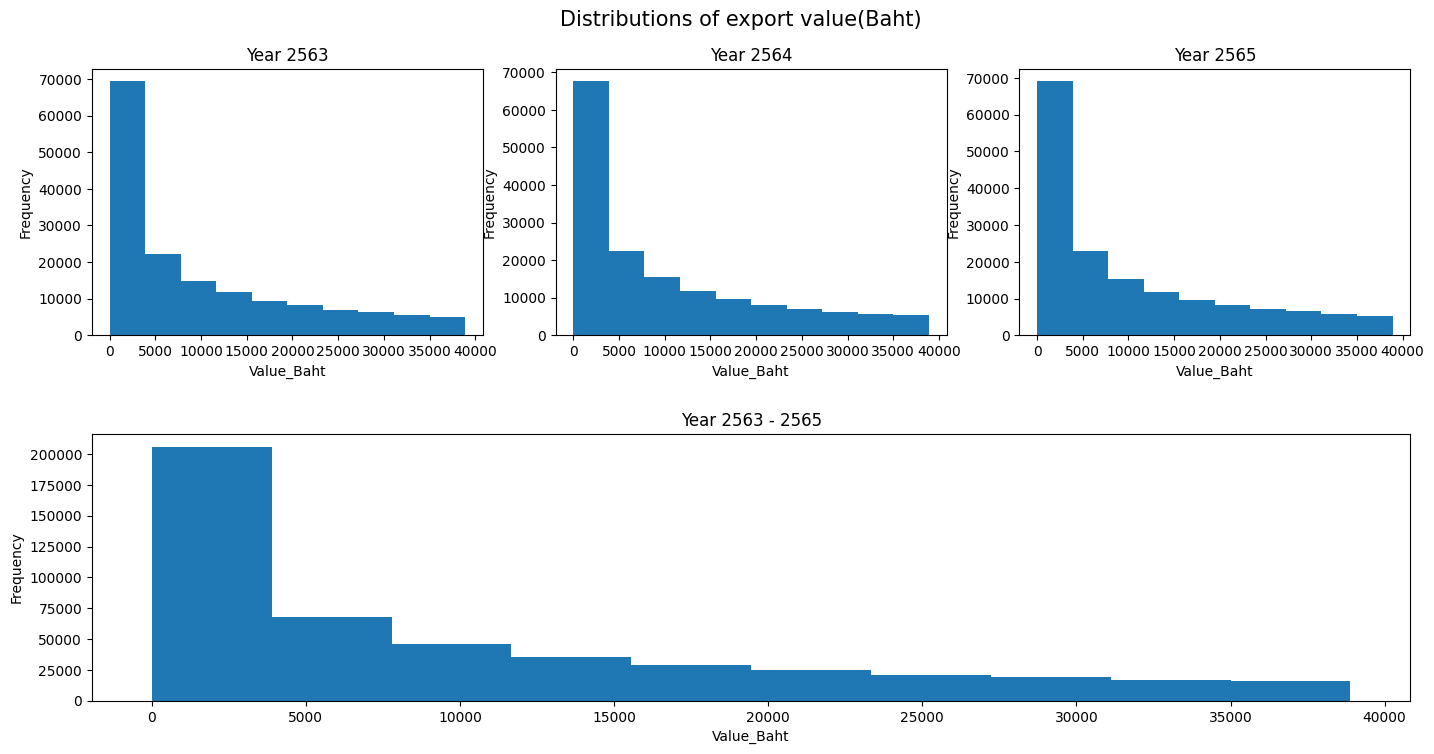

In [ ]:
# สร้าง histogram เพื่อดูการกระจายตัวของข้อมูลมูลค่าการส่งออกในแต่ละปี
fig, ax = plt.subplots(2, 2, figsize=(15,8))
fig.tight_layout(pad=5)
fig.suptitle('Distributions of export value(Baht)', fontsize=15)

# พล็อต histogram ของ value_Baht ของทั้ง 3 ปี(2563 - 2565)
plt.subplot(2, 1, 2)
plt.title("Year 2563 - 2565")
plt.xlabel('Value_Baht')
plt.ylabel('Frequency')
plt.hist(df_3year['Value_Baht'])

# พล็อต histogram ของ value_Baht ของปี 2563
plt.subplot(2, 3, 1)
plt.title("Year 2563")
plt.xlabel('Value_Baht')
plt.ylabel('Frequency')
plt.hist(df_3year.query("Year == 2563")['Value_Baht'])

# พล็อต histogram ของ value_Baht ของปี 2564
plt.subplot(2, 3, 2)
plt.title("Year 2564")
plt.xlabel('Value_Baht')
plt.ylabel('Frequency')
plt.hist(df_3year.query("Year == 2564")['Value_Baht'])

# พล็อต histogram ของ value_Baht ของปี 2565
plt.subplot(2, 3, 3)
plt.title("Year 2565")
plt.xlabel('Value_Baht')
plt.ylabel('Frequency')
plt.hist(df_3year.query("Year == 2565")['Value_Baht'])

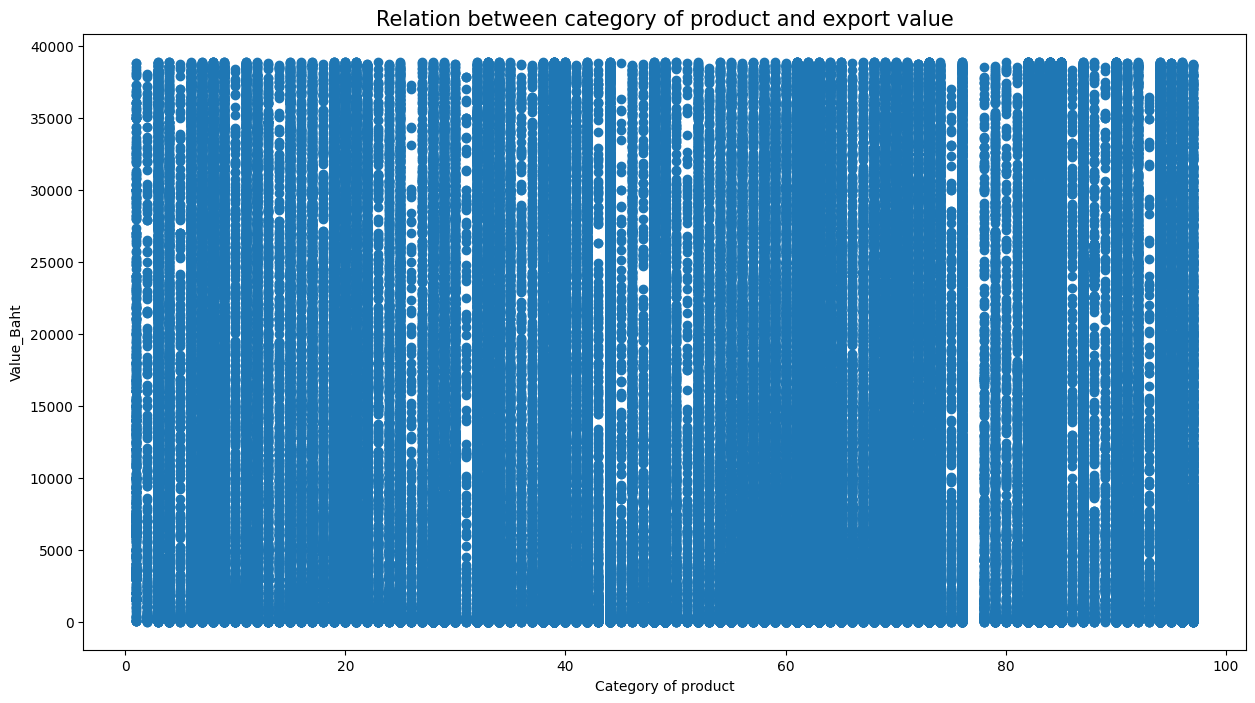

In [ ]:
# แสดงการกระจายตัวของมูลค่าการส่งออกในแต่ละเดือน ตลอดช่วงเวลา 3 ปี
plt.figure(figsize=(15,8))
plt.title("Relation between category of product and export value", fontsize = 15)
plt.xlabel("Category of product")
plt.ylabel("Value_Baht")
df = df_3year.copy()
df['HS_2dg'] = df['HS_2dg'].astype(int)
plt.scatter(df['HS_2dg'], df['Value_Baht'])

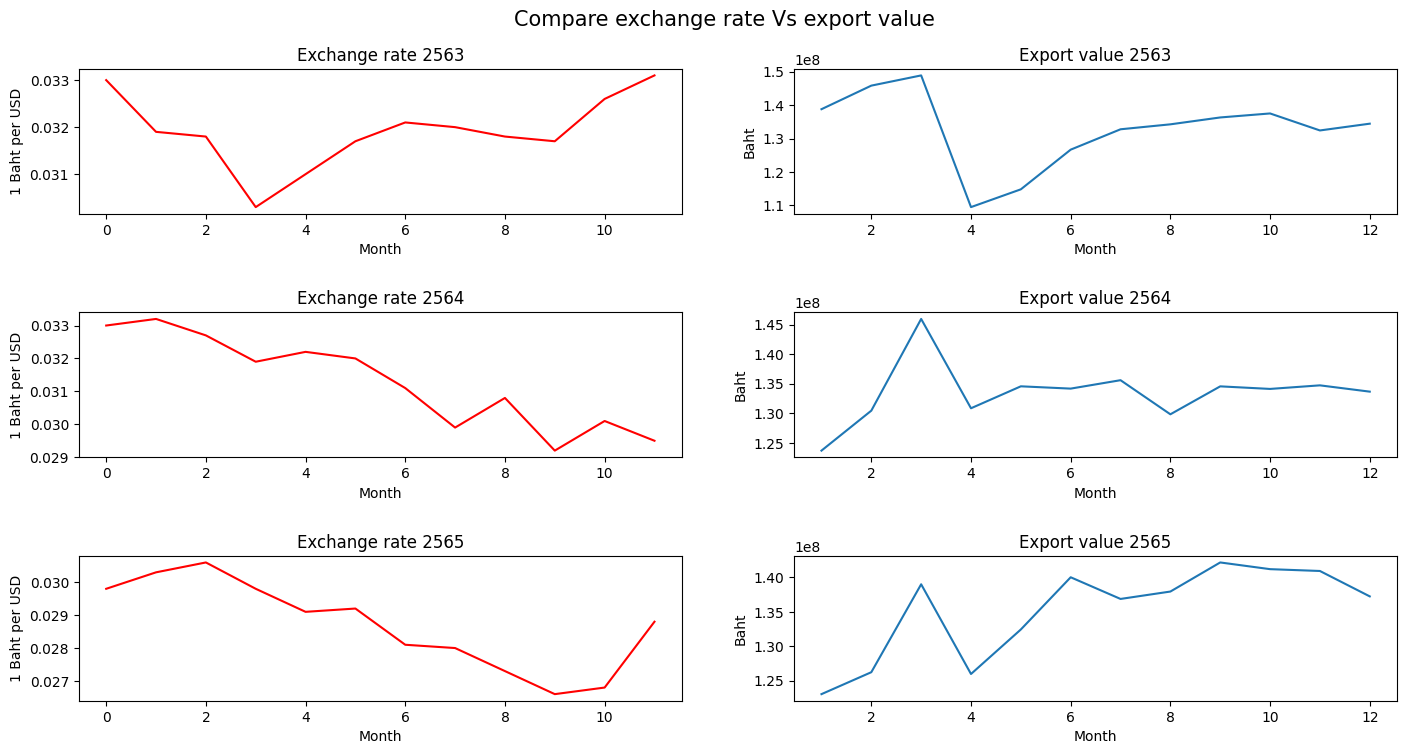

In [ ]:
# เปรียบเทียบอัตราแลกเปลี่ยนกับมูลค่าการส่งออกรวมของแต่ละเดือน

# สร้าง dafaframe ของมูลค่าการส่งออกรวมของแต่ละเดือนในแต่ละปีโดยใช้ Groupby month
ep_Value63 = df_3year.query("Year == 2563").groupby("Month")["Value_Baht"].sum()
ep_Value64 = df_3year.query("Year == 2564").groupby("Month")["Value_Baht"].sum()
ep_Value65 = df_3year.query("Year == 2565").groupby("Month")["Value_Baht"].sum()

fig, ax = plt.subplots(3, 2, figsize=(15,8))
fig.tight_layout(pad=5)
fig.suptitle('Compare exchange rate Vs export value ', fontsize=15)

# พล็อต กราฟเส้นของอัตราแลกเปลี่ยนกับมูลค่าการส่งออกรวมในปี 2563
plt.subplot(3, 2, 1)
plt.title("Exchange rate 2563")
plt.xlabel('Month')
plt.ylabel('1 Baht per USD')
plt.plot(exchange_rate2563, color = "r")

plt.subplot(3, 2, 2)
plt.title("Export value 2563")
plt.xlabel('Month')
plt.ylabel('Baht')
plt.plot(ep_Value63)

# พล็อต กราฟเส้นของอัตราแลกเปลี่ยนกับมูลค่าการส่งออกรวมในปี 2564
plt.subplot(3, 2, 3)
plt.title("Exchange rate 2564")
plt.xlabel('Month')
plt.ylabel('1 Baht per USD')
plt.plot(exchange_rate2564, color = "r")

plt.subplot(3, 2, 4)
plt.title("Export value 2564")
plt.xlabel('Month')
plt.ylabel('Baht')
plt.plot(ep_Value64)

# พล็อต กราฟเส้นของอัตราแลกเปลี่ยนกับมูลค่าการส่งออกรวมในปี 2565
plt.subplot(3, 2, 5)
plt.title("Exchange rate 2565")
plt.xlabel('Month')
plt.ylabel('1 Baht per USD')
plt.plot(exchange_rate2565, color = "r")

plt.subplot(3, 2, 6)
plt.title("Export value 2565")
plt.xlabel('Month')
plt.ylabel('Baht')
plt.plot(ep_Value65)

Text(0, 0.5, 'Value_Baht')

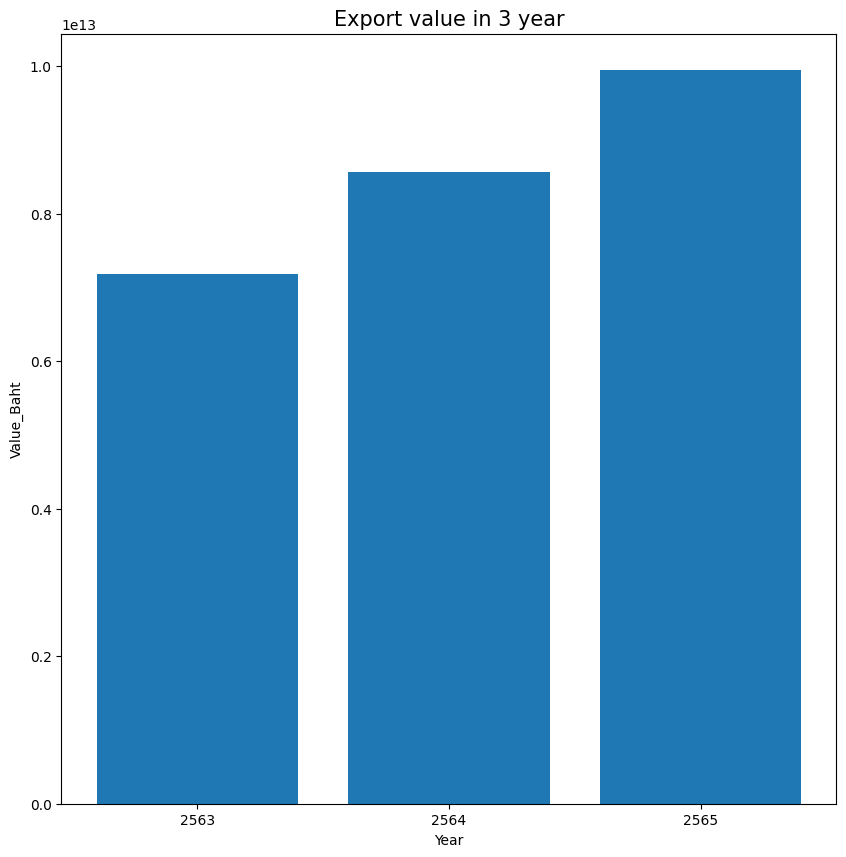

In [ ]:
# เปรียบเทียบมูลค่าการส่งออกของแต่ละปี
from seaborn._core.properties import FontSize

# รวมมูลค่าการส่งออกของแต่ละปี
plt.subplots(figsize=(10, 10))
plt.title("Export value in 3 year", fontsize = 15)
year = ['2563', '2564', '2565']
data = np.array(df_3year.groupby("Year")["Value_Baht"].sum())
plt.bar(year, data)
plt.xlabel("Year")
plt.ylabel("Value_Baht")

<ipython-input-31-21a0042b03fb>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)
<ipython-input-31-21a0042b03fb>:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 1)
<ipython-input-31-21a0042b03fb>:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 2)


([], [])

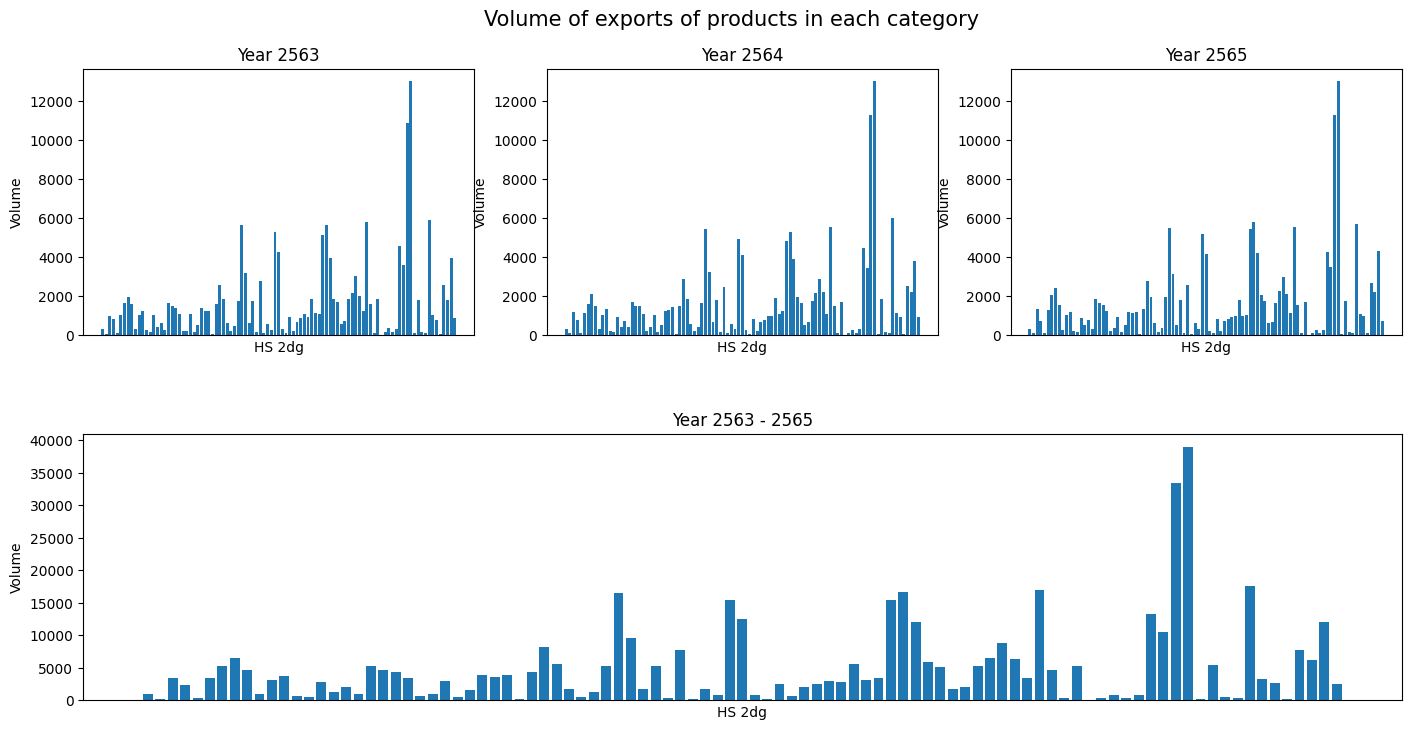

In [ ]:
# เปรียบเทียบจำนวนของการส่งออกสินค้าในแต่ละประเภท

arr_hs_code = set(df_3year["HS_2dg"])
hs_code_order = np.sort(list(arr_hs_code))

def plotHS_code(copy):
  copy.set_index('HS_2dg', inplace=True)
  copy = copy.loc[hs_code_order]
  to_plot = copy.index.value_counts(sort=False)
  return to_plot

fig, ax = plt.subplots(2, 2, figsize=(15,8))
fig.tight_layout(pad=5)
fig.suptitle('Volume of exports of products in each category', fontsize=15)

# พล็อต Bar chart ของจำนวนการส่งออกสินค้าในแต่ละประเภทปี 2563 - 2565
plt.subplot(2, 1, 2)
plt.title("Year 2563 - 2565")
plt.xlabel('HS 2dg')
plt.ylabel('Volume')
copy = df_3year.copy()
to_plot = plotHS_code(copy)
plt.bar(to_plot.index, to_plot.values)
plt.xticks([])

# พล็อต Bar chart ของจำนวนของการส่งออกสินค้าในแต่ละประเภทปี 2563
plt.subplot(2, 3, 1)
plt.title("Year 2563")
plt.xlabel('HS 2dg')
plt.ylabel('Volume')
copy = df_3year.query("Year == 2563").copy()
to_plot1 = plotHS_code(copy)
plt.bar(to_plot1.index, to_plot1.values)
plt.xticks([])

# พล็อต Bar chart ของจำนวนของการส่งออกสินค้าในแต่ละประเภทปี 2564
plt.subplot(2, 3, 2)
plt.title("Year 2564")
plt.xlabel('HS 2dg')
plt.ylabel('Volume')
copy = df_3year.query("Year == 2564").copy()
to_plot2 = plotHS_code(copy)
plt.bar(to_plot2.index, to_plot2.values)
plt.xticks([])

# พล็อต Bar chart ของจำนวนของการส่งออกสินค้าในแต่ละประเภทปี 2565
plt.subplot(2, 3, 3)
plt.title("Year 2565")
plt.xlabel('HS 2dg')
plt.ylabel('Volume')
copy = df_3year.query("Year == 2565").copy()
to_plot3 = plotHS_code(copy)
plt.bar(to_plot3.index, to_plot3.values)
plt.xticks([])

In [ ]:
# ประเภทและจำนวนสินค้าที่ส่งออกสูงสุดของแต่ละปี
print(f'2563: {hs_code_order[to_plot1.idxmax()]} volume = {to_plot1.max()} ครั้ง')
print(f'2564: {hs_code_order[to_plot2.idxmax()]} volume = {to_plot2.max()} ครั้ง')
print(f'2565: {hs_code_order[to_plot3.idxmax()]} volume = {to_plot3.max()} ครั้ง')
print(f'2563 - 2565: {hs_code_order[to_plot.idxmax()]} volume = {to_plot.max()} ครั้ง')

2563: 87 volume = 13003 ครั้ง
2564: 87 volume = 13030 ครั้ง
2565: 87 volume = 13028 ครั้ง
2563 - 2565: 87 volume = 39061 ครั้ง


In [ ]:
df_3year.query("HS_2dg == 87")['คำอธิบาย-HS 2dg'].head(1)

8864    ยานบกนอกจากรถที่เดินบนรางรถไฟหรือรางรถราง\nส่ว...
Name: คำอธิบาย-HS 2dg, dtype: object

<ipython-input-47-9f719a541511>:25: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

<ipython-input-47-9f719a541511>:35: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

<ipython-input-47-9f719a541511>:45: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



([], [])

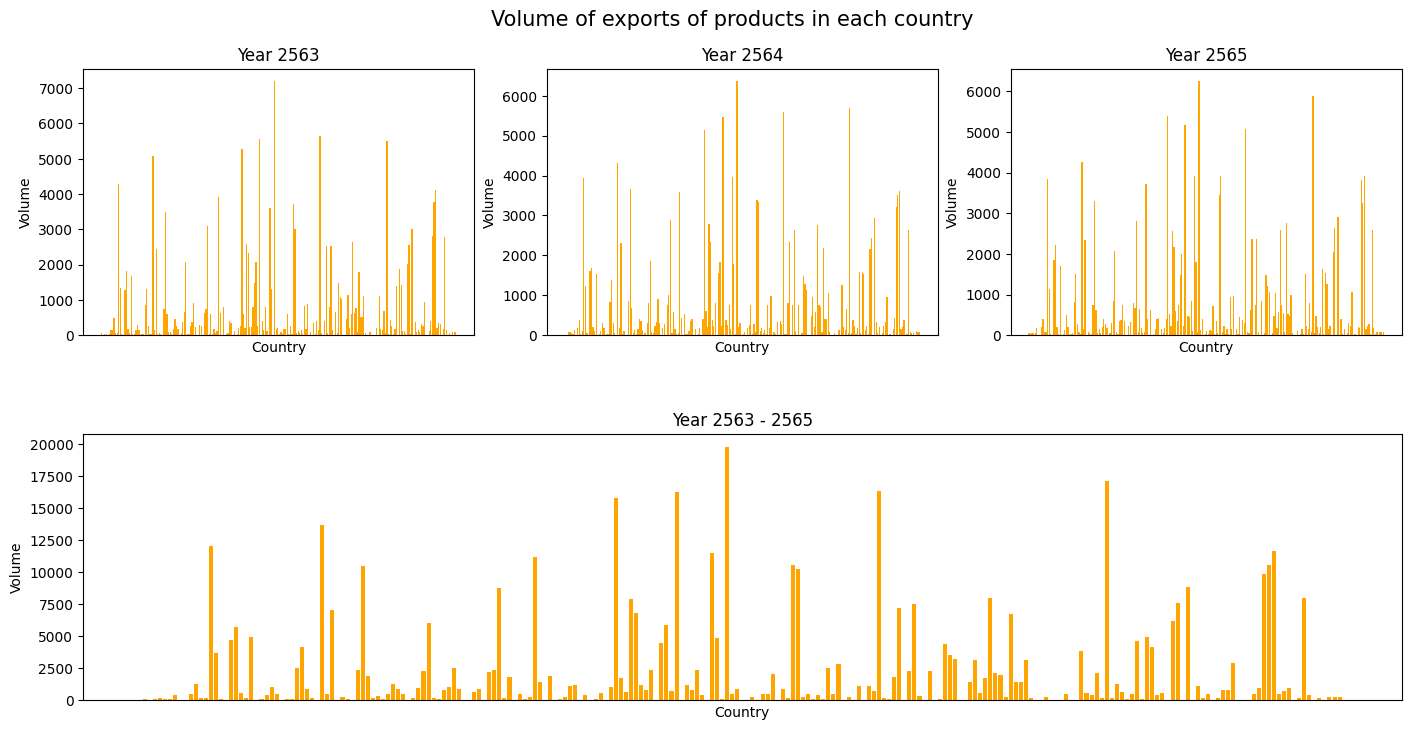

In [ ]:
# เปรียบเทียบจำนวนของการส่งออกของสินค้าทุกประเภทในแต่ละประเทศ

# สร้าง array ในการเรียงชื่อประเทศตามอักษร
arr_country63 = set(df_3year.query("Year == 2563")["Country"])
country_order63 = np.sort(list(arr_country63))
arr_country64 = set(df_3year.query("Year == 2564")["Country"])
country_order64 = np.sort(list(arr_country64))
arr_country65 = set(df_3year.query("Year == 2565")["Country"])
country_order65 = np.sort(list(arr_country65))
arr_country = set(df_3year["Country"])
country_order = np.sort(list(arr_country))

# สร้างฟังก์ชันเพื่อเตรียมข้อมูลในการพล็อต bar chart
def plotCountry_code(copy, order):
  copy.set_index('Country', inplace=True)
  copy = copy.loc[order]
  to_plot = copy.index.value_counts(sort=False)
  return to_plot

fig, ax = plt.subplots(2, 2, figsize=(15,8))
fig.tight_layout(pad=5)
fig.suptitle('Volume of exports of products in each country', fontsize=15)

# พล็อต Bar chart ของจำนวนการส่งออกสินค้าในแต่ละประเภทปี 2563 - 2565
plt.subplot(2, 1, 2)
plt.title("Year 2563 - 2565")
plt.xlabel('Country')
plt.ylabel('Volume')
copy = df_3year.copy()
to_plot = plotCountry_code(copy, country_order)
plt.bar(to_plot.index, to_plot.values, color = 'orange')
plt.xticks([])

# พล็อต Bar chart ของจำนวนของการส่งออกสินค้าในแต่ละประเภทปี 2563
plt.subplot(2, 3, 1)
plt.title("Year 2563")
plt.xlabel('Country')
plt.ylabel('Volume')
copy = df_3year.query("Year == 2563").copy()
to_plot1 = plotCountry_code(copy, country_order63)
plt.bar(to_plot1.index, to_plot1.values, color = 'orange')
plt.xticks([])

# พล็อต Bar chart ของจำนวนของการส่งออกสินค้าในแต่ละประเภทปี 2564
plt.subplot(2, 3, 2)
plt.title("Year 2564")
plt.xlabel('Country')
plt.ylabel('Volume')
copy = df_3year.query("Year == 2564").copy()
to_plot2 = plotCountry_code(copy, country_order64)
plt.bar(to_plot2.index, to_plot2.values, color = 'orange')
plt.xticks([])

# พล็อต Bar chart ของจำนวนของการส่งออกสินค้าในแต่ละประเภทปี 2565
plt.subplot(2, 3, 3)
plt.title("Year 2565")
plt.xlabel('Country')
plt.ylabel('Volume')
copy = df_3year.query("Year == 2565").copy()
to_plot3 = plotCountry_code(copy, country_order65)
plt.bar(to_plot3.index, to_plot3.values, color = 'orange')
plt.xticks([])

In [ ]:
# ประเทศและจำนวนสินค้าที่ส่งออกสูงสุดของแต่ละปี
print(f'2563: {to_plot1.idxmax()} volume = {to_plot1.max()} ครั้ง')
print(f'2564: {to_plot2.idxmax()} volume = {to_plot2.max()} ครั้ง')
print(f'2565: {to_plot3.idxmax()} volume = {to_plot3.max()} ครั้ง')
print(f'2563 - 2565: {to_plot.idxmax()} volume = {to_plot.max()} ครั้ง')

2563: LAO REPUBLIC volume = 7194 ครั้ง
2564: LAO REPUBLIC volume = 6362 ครั้ง
2565: LAO REPUBLIC volume = 6244 ครั้ง
2563 - 2565: LAO REPUBLIC volume = 19800 ครั้ง


Text(1058.1767676767674, 0.5, 'Value_Baht')

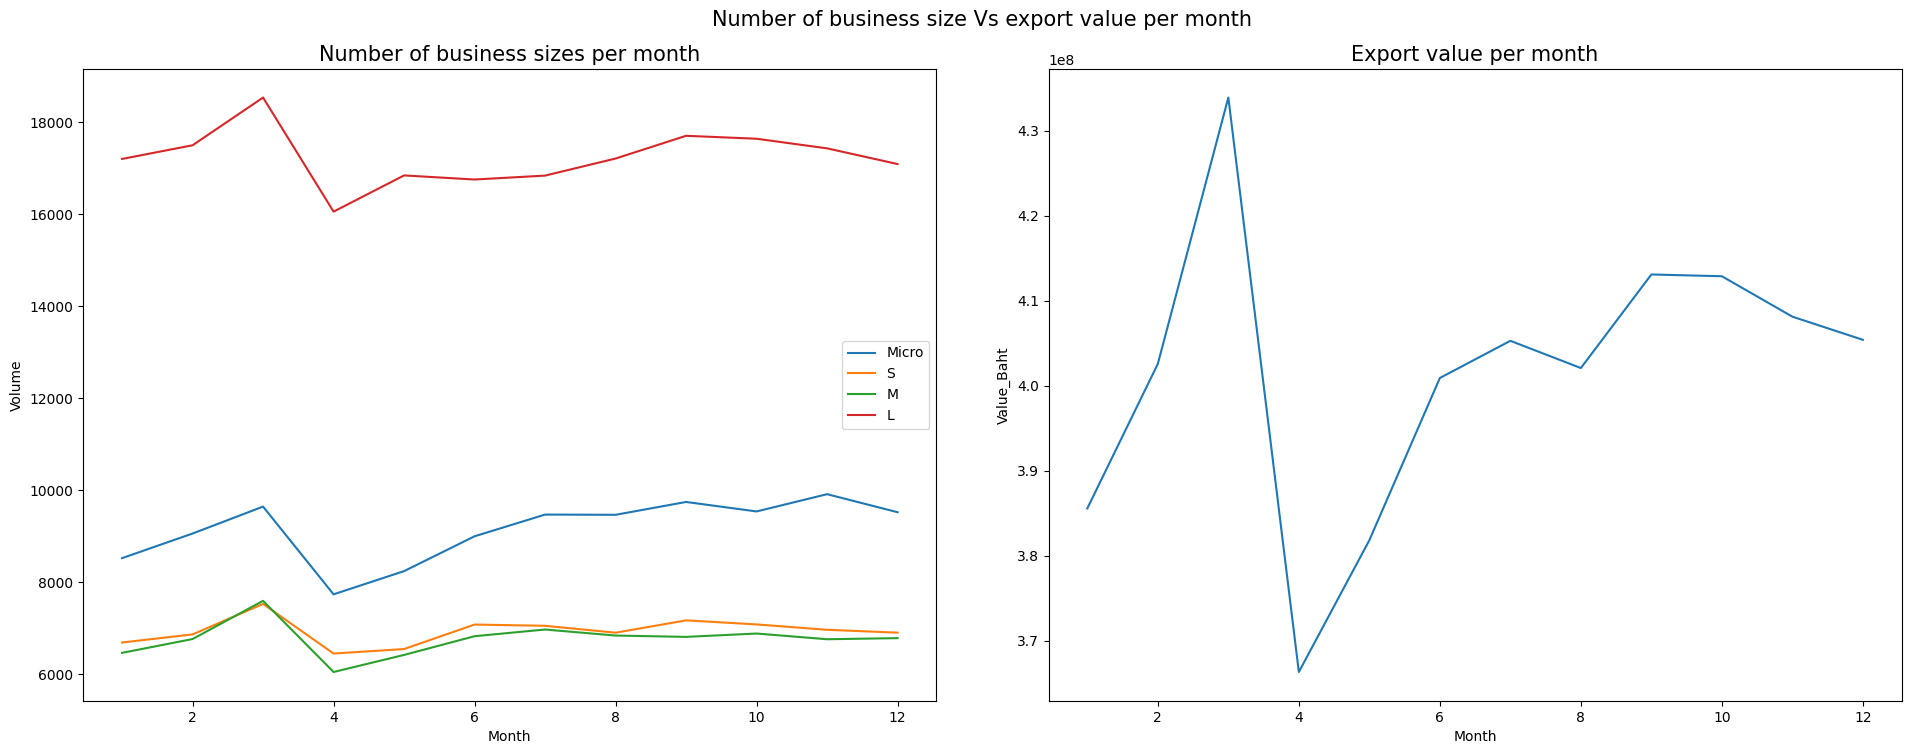

In [ ]:
# เปรียบเทียบจำนวนของธุรกิจแต่ละขนาดของแต่ละเดือน ในช่วง 3 ปี
fig, ax = plt.subplots(1, 2, figsize=(20,8))
fig.tight_layout(pad=5)
fig.suptitle('Number of business size Vs export value per month', fontsize=15)
# สร้าง Binary index สำหรับธุรกิจแต่ละขนาด
# Micro
df_size = df_3year.copy()
micro = np.where(df_size['Business_size'] == 'Micro', 1.0, 0.0)
df_size['Micro'] = micro
# S(small)
s = np.where(df_size['Business_size'] == 'S', 1.0, 0.0)
df_size['S'] = s
# M(medium)
m = np.where(df_size['Business_size'] == 'M', 1.0, 0.0)
df_size['M'] = m
# L(Large)
l = np.where(df_size['Business_size'] == 'L', 1.0, 0.0)
df_size['L'] = l
df = df_size.groupby("Month")[["Micro", 'S', 'M', 'L']].sum()
plt.subplot(1, 2, 1)
plt.plot(df)
plt.title("Number of business sizes per month", fontsize = 15)
plt.legend(['Micro', 'S', 'M', 'L'])
plt.xlabel("Month")
plt.ylabel("Volume")

plt.subplot(1, 2, 2)
plt.plot(df_3year.groupby("Month")["Value_Baht"].sum())
plt.title("Export value per month", fontsize = 15)
plt.xlabel("Month")
plt.ylabel("Value_Baht")

<ipython-input-50-eef90a77661e>:16: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

<ipython-input-50-eef90a77661e>:25: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

<ipython-input-50-eef90a77661e>:34: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



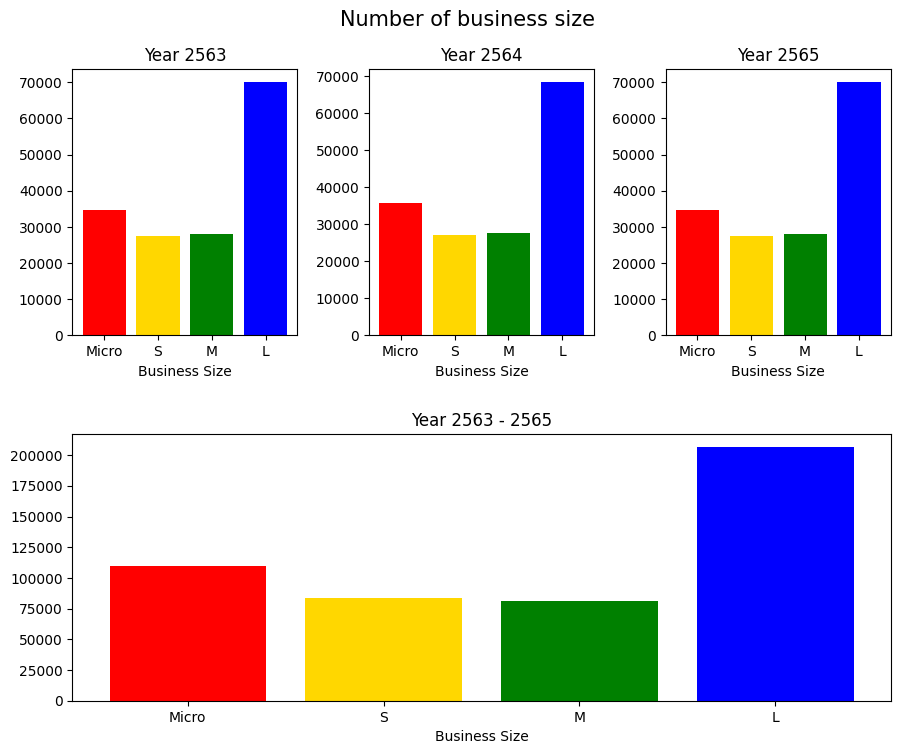

In [ ]:
# เปรียบเทียบจำนวนของธุรกิจแต่ละขนาดของแต่ละปี

# สร้างฟังก์ชันในการเรียงข้อมูลของ 'Business size' ในรูปแบบ [Micro, S, M, L]
size_order = ['Micro','S','M','L']
def plotSize(copy):
  copy.set_index('Business_size', inplace=True)
  copy = copy.loc[size_order]
  to_plot = copy.index.value_counts(sort=False)
  return to_plot

fig, ax = plt.subplots(2, 2, figsize=(10,8))
fig.tight_layout(pad=5)
fig.suptitle('Number of business size ', fontsize=15)

# พล็อต Bar chart ของ business size ของทั้ง 3 ปี(2563 - 2565)
plt.subplot(2, 1, 2)
plt.title("Year 2563 - 2565")
plt.xlabel('Business Size')
copy = df_3year.copy()
to_plot = plotSize(copy)
for i, c in zip([0, 1, 2, 3], ["r",'gold','g','b']):
  plt.bar(to_plot.index[i], to_plot.values[i], color = c)

# พล็อต Bar chart ของ business size ของปี 2563
plt.subplot(2, 3, 1)
plt.title("Year 2563")
plt.xlabel('Business Size')
copy1 = df_3year.query("Year == 2563").copy()
to_plot1 = plotSize(copy1)
for i, c in zip([0, 1, 2, 3], ["r",'gold','g','b']):
  plt.bar(to_plot1.index[i], to_plot1.values[i], color = c)

# พล็อต Bar chart ของ business size ของปี 2564
plt.subplot(2, 3, 2)
plt.title("Year 2564")
plt.xlabel('Business Size')
copy2 = df_3year.query("Year == 2564").copy()
to_plot2 = plotSize(copy2)
for i, c in zip([0, 1, 2, 3], ["r",'gold','g','b']):
  plt.bar(to_plot2.index[i], to_plot2.values[i], color = c)

# พล็อต Bar chart ของ business size ของปี 2565
plt.subplot(2, 3, 3)
plt.title("Year 2565")
plt.xlabel('Business Size')
copy3 = df_3year.query("Year == 2563").copy()
to_plot3 = plotSize(copy3)
for i, c in zip([0, 1, 2, 3], ["r",'gold','g','b']):
  plt.bar(to_plot3.index[i], to_plot3.values[i], color = c)

# Model

In [ ]:
# ทำการ drop column ที่ไม่ได้นำมาใช้ในการสร้างโมเดลออก
X = df_3year.copy().drop(["คำอธิบาย-HS 2dg", 'Month', 'Year'], axis=1)
X

,Country,HS_2dg,Value_Baht,Business_size,exchange_rate
2,UNITED ARAB EMIRATES,2,349,L,0.0320
7,UNITED ARAB EMIRATES,3,32725,M,0.0318
11,UNITED ARAB EMIRATES,3,19179,Micro,0.0330
12,UNITED ARAB EMIRATES,3,20106,Micro,0.0319
14,UNITED ARAB EMIRATES,3,12703,Micro,0.0317
...,...,...,...,...,...
1705090,ZIMBABWE,85,3302,M,0.0273
1705137,ZIMBABWE,87,24680,Micro,0.0298
1705149,ZIMBABWE,90,1495,L,0.0268
1705150,ZIMBABWE,95,9650,L,0.0298


In [ ]:
# ทำการแปลงข้อมูลเชิงคุณภาพ ให้เป็นตัวเลข เพื่อนำไปสร้างโมเดล
# แปลง column 'Country'
country_map = {country : num + 1 for num, country in enumerate(X["Country"].unique())}
X["country_endcoded"] = X['Country'].map(country_map)
del X["Country"]

# แปลง column 'Business_size'
size_map = {size : num + 1 for num, size in enumerate(X["Business_size"].unique())}
X["Bsize_endcoded"] = X['Business_size'].map(size_map)
del X["Business_size"]

# แปลง column 'HS_2dg'
X["HS_2dg"] = X["HS_2dg"].astype(int)

X

,HS_2dg,Value_Baht,exchange_rate,country_endcoded,Bsize_endcoded
2,2,349,0.0320,1,1
7,3,32725,0.0318,1,2
11,3,19179,0.0330,1,3
12,3,20106,0.0319,1,3
14,3,12703,0.0317,1,3
...,...,...,...,...,...
1705090,85,3302,0.0273,228,2
1705137,87,24680,0.0298,228,3
1705149,90,1495,0.0268,228,1
1705150,95,9650,0.0298,228,1


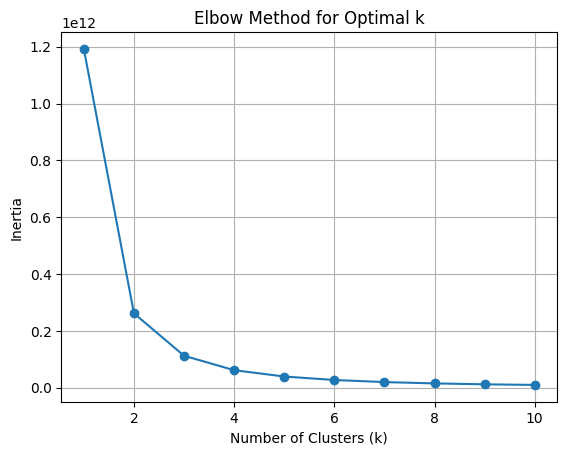

In [ ]:
# หาจำนวนกลุ่มในการแบ่งโดยใช้ elbow curve
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

subset = X.sample(n=10000)
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(subset)
    inertias.append(kmeans.inertia_)

# Plot lbow curve
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

In [ ]:
# ทำการแบ่งข้อมูลออกเป็น 3 กลุ่ม
model = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(X)
preds = model.predict(X)
export_kmeans = X.copy()
export_kmeans['clusters'] = preds

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


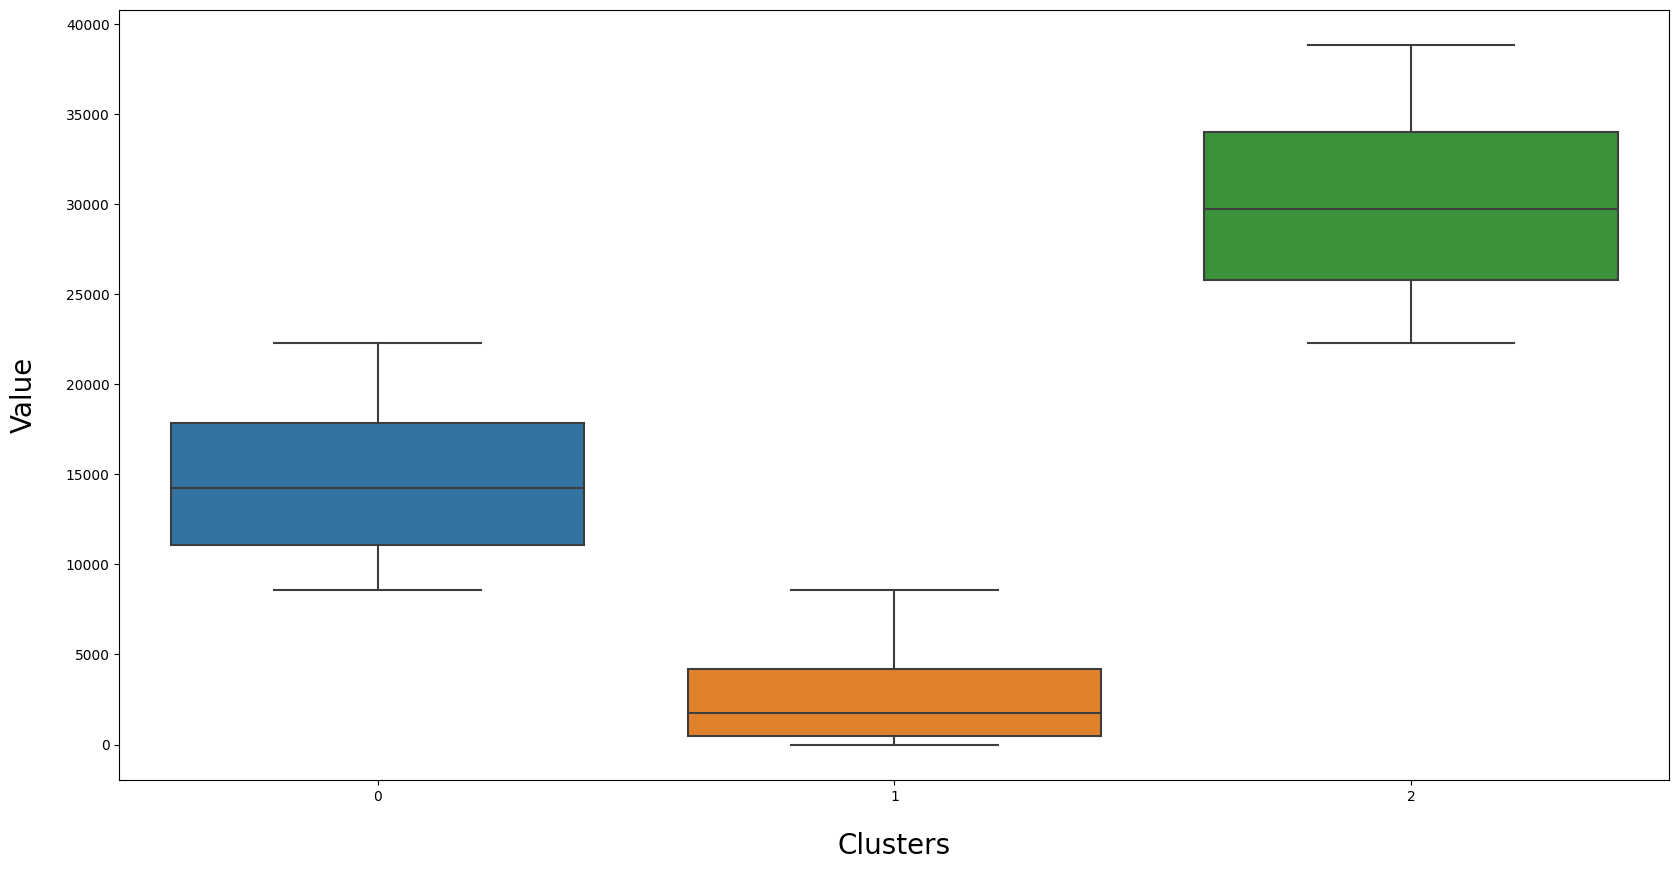

In [ ]:
# boxplot แสดงมูลค่าการส่งออกในแต่ละ Clusters
plt.figure(figsize=(20,10))
sns.boxplot(data=export_kmeans, x='clusters', y = 'Value_Baht');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Value', fontsize=20, labelpad=20);

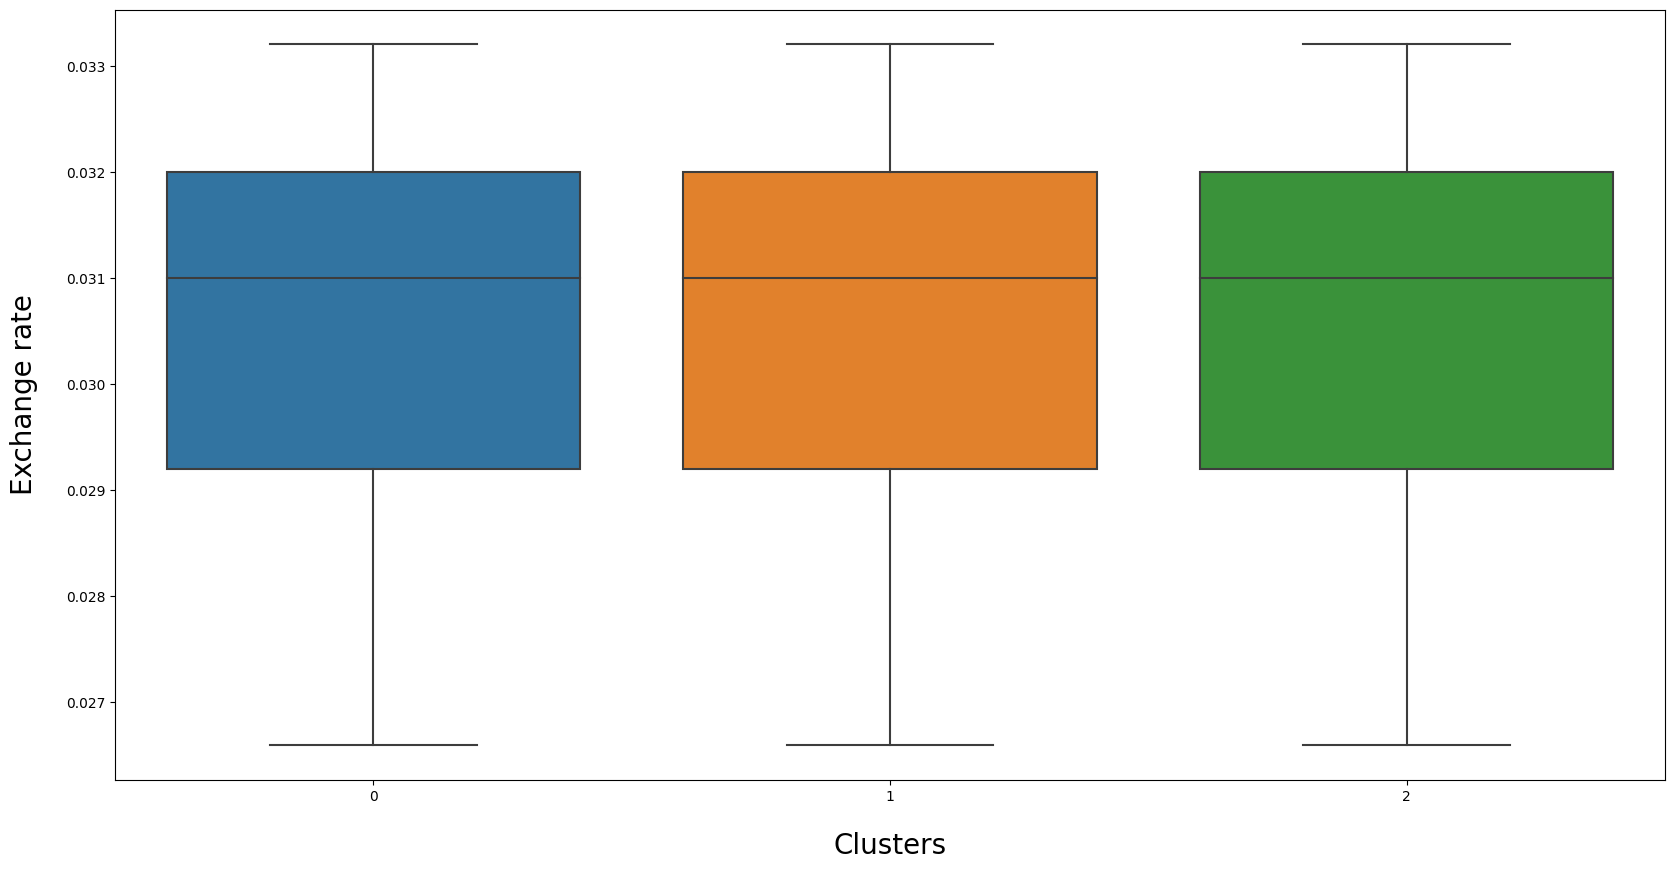

In [ ]:
# boxplot แสดงอัตราแลกเปลี่ยนในแต่ละ Clusters
plt.figure(figsize=(20,10))
sns.boxplot(data=export_kmeans, x='clusters', y = 'exchange_rate');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Exchange rate', fontsize=20, labelpad=20);

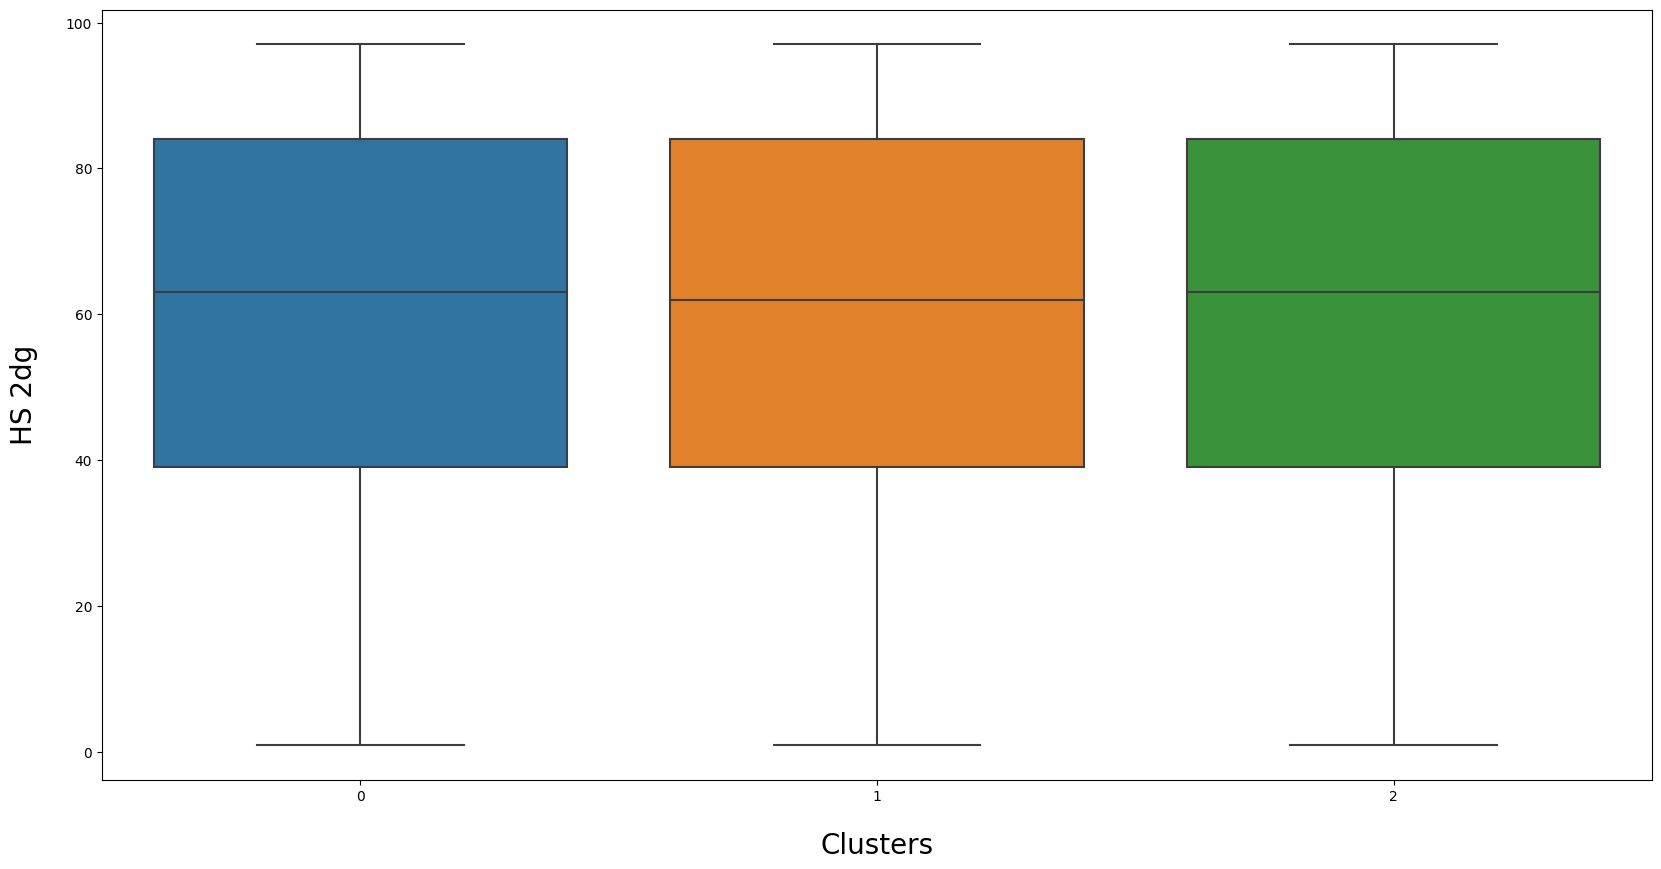

In [ ]:
# boxplot แสดงประเภทสินค้าในการส่งออกในแต่ละ Clusters
plt.figure(figsize=(20,10))
sns.boxplot(data=export_kmeans, x='clusters', y = 'HS_2dg');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('HS 2dg', fontsize=20, labelpad=20);

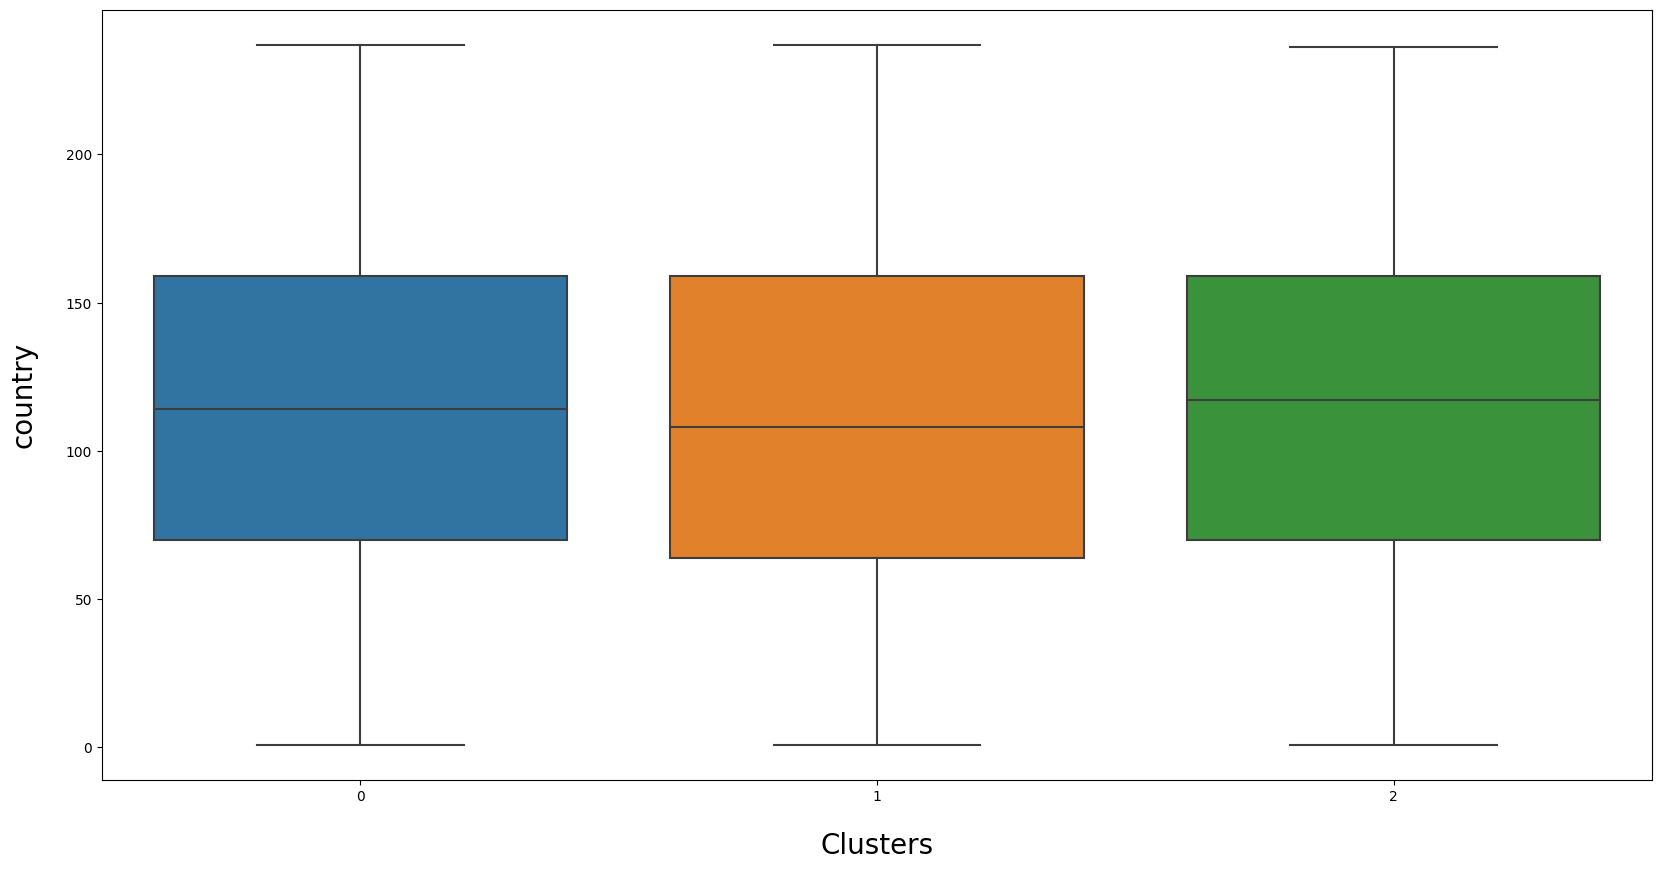

In [ ]:
# boxplot แสดงกลุ่มประเทศของการส่งออกในแต่ละ Clusters
plt.figure(figsize=(20,10))
sns.boxplot(data=export_kmeans, x='clusters', y = 'country_endcoded');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('country', fontsize=20, labelpad=20);

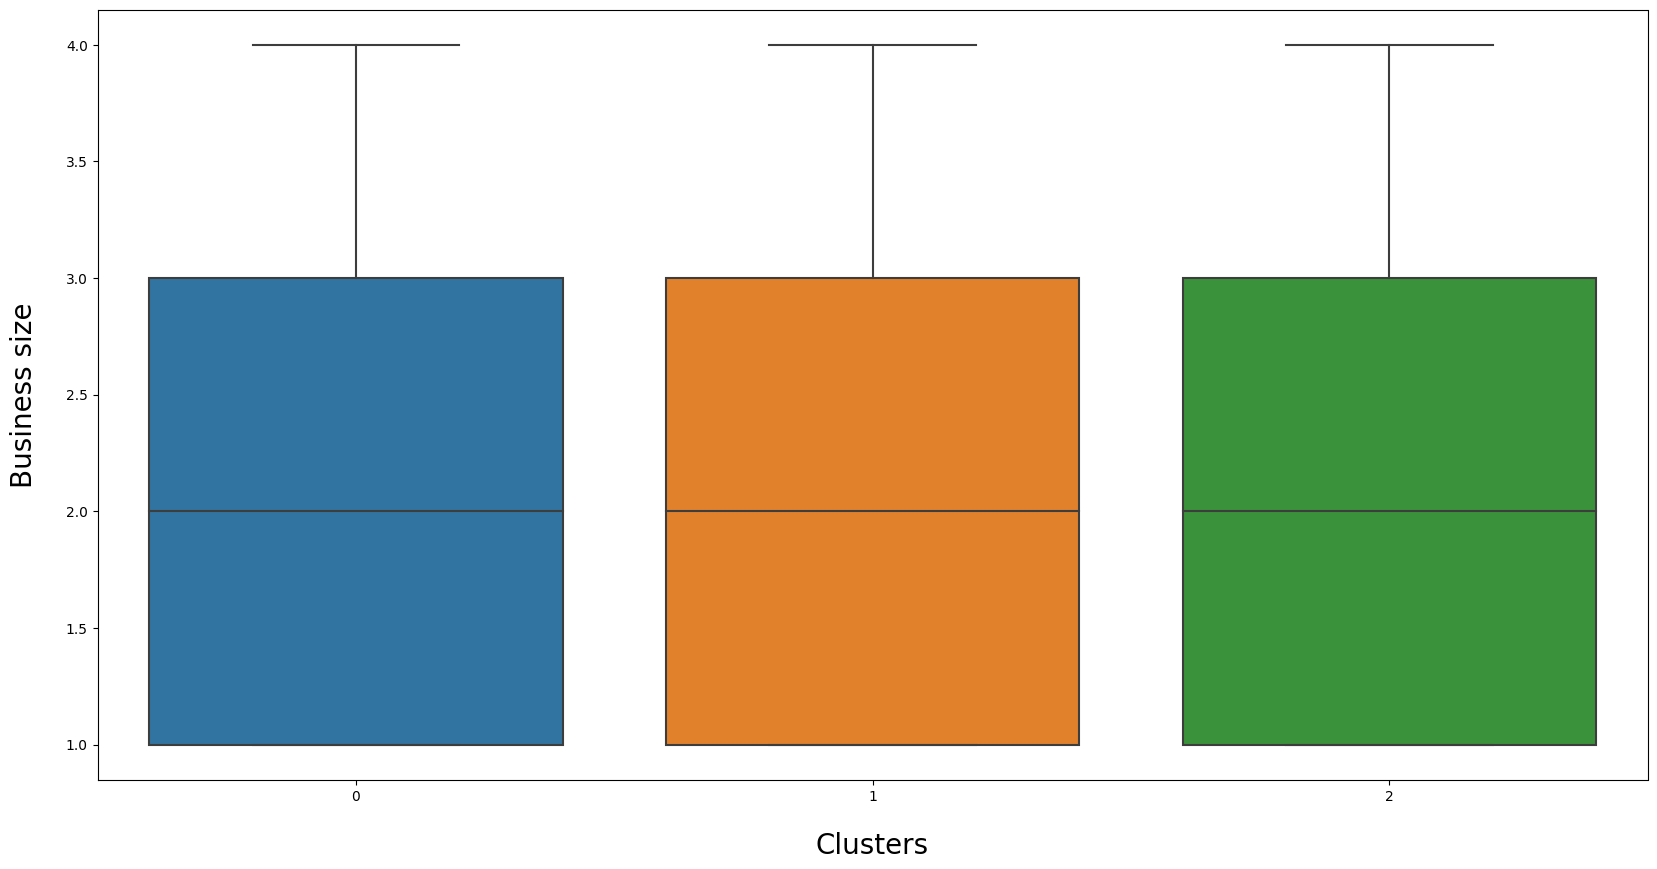

In [ ]:
# boxplot แสดงขนาดธุรกิจของการส่งออกในแต่ละ Clusters
plt.figure(figsize=(20,10))
sns.boxplot(data=export_kmeans, x='clusters', y = 'Bsize_endcoded');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Business size', fontsize=20, labelpad=20);

# สรุปผล

In [ ]:
# ทำการกำหนดประเภทของมูลค่าการส่งออกที่ได้จากการแบ่ง clusters 3 กลุ่ม
#                                  มูลค่าการส่งออกต่ำ       = low
#                                  มูลค่าการส่งออกปานกลาง  = mid
#                                  มูลค่าการส่งออกสูง       = high
export_kmeans.clusters = export_kmeans.clusters.replace({1: 'Low',
                                                         0: 'Mid',
                                                         2: 'High'})
df_model = df_3year.copy()
df_model['clusters'] = export_kmeans.clusters
df_model

,Country,HS_2dg,คำอธิบาย-HS 2dg,Value_Baht,Business_size,Month,Year,exchange_rate,clusters
2,UNITED ARAB EMIRATES,2,เนื้อสัตว์และส่วนอื่นของสัตว์ที่บริโภคได้,349,L,8,2563,0.0320,Low
7,UNITED ARAB EMIRATES,3,ปลา สัตว์น้ำจำพวกครัสตาเซีย โมลลุสก์ และสัตว์น...,32725,M,3,2563,0.0318,High
11,UNITED ARAB EMIRATES,3,ปลา สัตว์น้ำจำพวกครัสตาเซีย โมลลุสก์ และสัตว์น...,19179,Micro,1,2563,0.0330,Mid
12,UNITED ARAB EMIRATES,3,ปลา สัตว์น้ำจำพวกครัสตาเซีย โมลลุสก์ และสัตว์น...,20106,Micro,2,2563,0.0319,Mid
14,UNITED ARAB EMIRATES,3,ปลา สัตว์น้ำจำพวกครัสตาเซีย โมลลุสก์ และสัตว์น...,12703,Micro,10,2563,0.0317,Mid
...,...,...,...,...,...,...,...,...,...
1705090,ZIMBABWE,85,เครื่องจักรไฟฟ้า เครื่องอุปกรณ์ไฟฟ้า และส่วนปร...,3302,M,9,2565,0.0273,Low
1705137,ZIMBABWE,87,ยานบกนอกจากรถที่เดินบนรางรถไฟหรือรางรถราง ส่วน...,24680,Micro,1,2565,0.0298,High
1705149,ZIMBABWE,90,อุปกรณ์และเครื่องอุปกรณ์ที่ใช้ในทางทัศนศาสตร์ ...,1495,L,11,2565,0.0268,Low
1705150,ZIMBABWE,95,ของเล่น ของเล่นเกม และของใช้ที่จำเป็นในการเล่น...,9650,L,1,2565,0.0298,Mid


In [ ]:
# สร้าง pie chart แสดงการกระจายตัวของมูลค่าการส่งออกในแต่ละกลุ่ม
import plotly.express as px
cluster_counts = df_model.clusters.value_counts()

fig = px.pie(cluster_counts,
             values = cluster_counts.values,
             names = cluster_counts.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



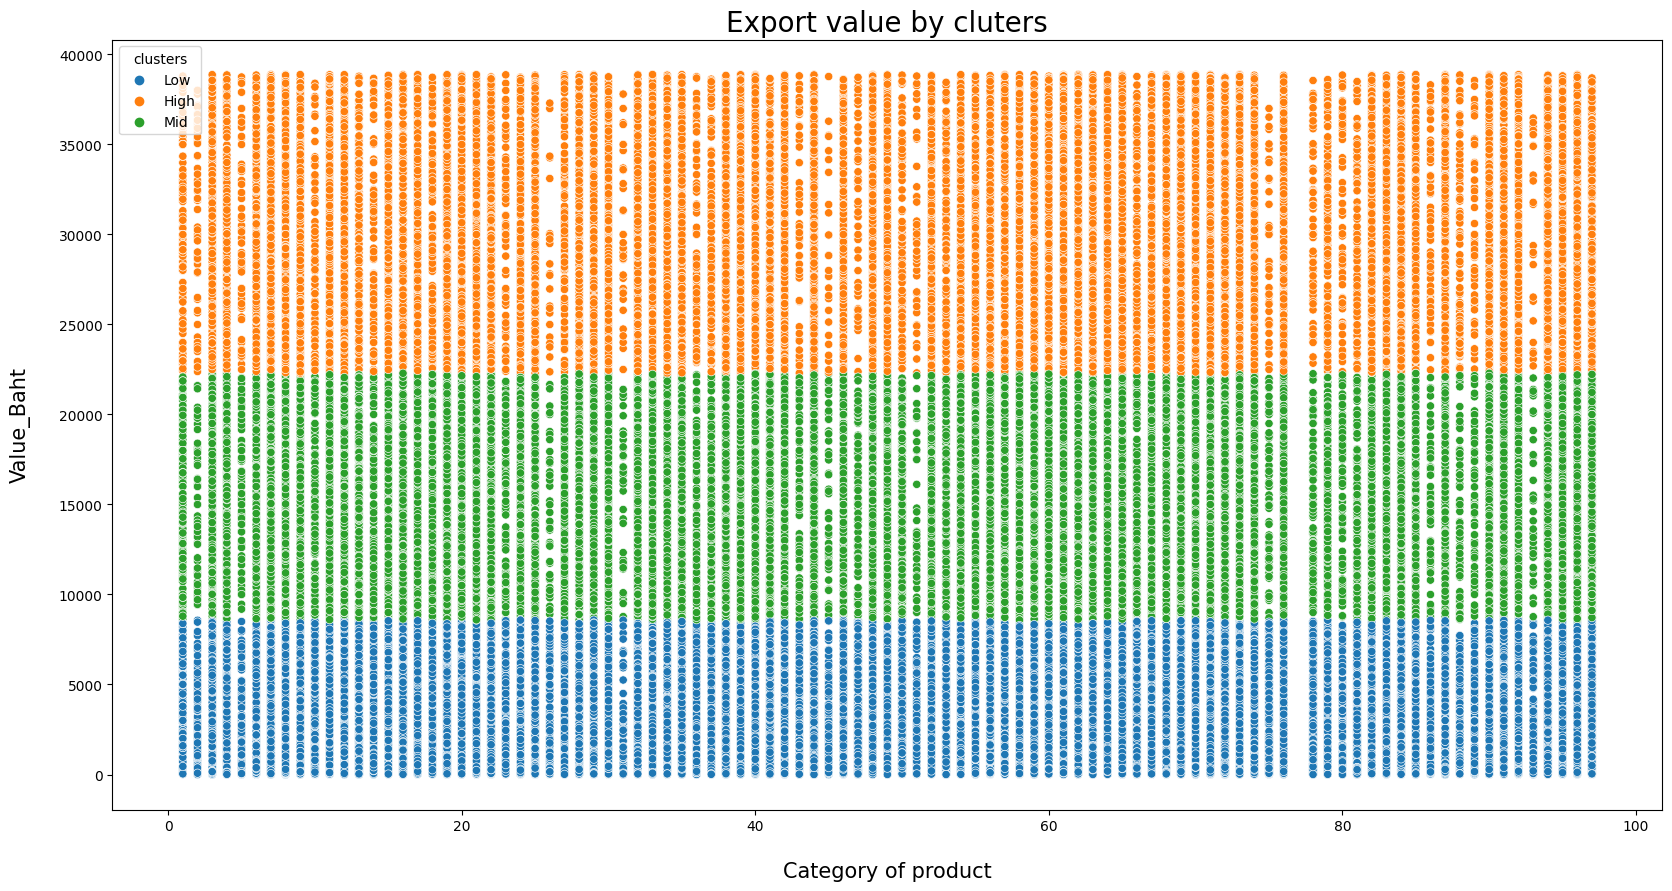

In [ ]:
# scatterplot แสดงการเปรียบเทียบการกระจายตัวของมูลค่าการส่งออกในแต่ละกลุ่ม
plt.figure(figsize=(20,10))
df_model['clusters'] = export_kmeans.clusters
sns.scatterplot(data=df_model, x='HS_2dg', y='Value_Baht', hue='clusters');
plt.title("Export value by cluters", fontsize=20)
plt.xlabel('Category of product', fontsize=15, labelpad=20)
plt.ylabel('Value_Baht', fontsize=15, labelpad=20);

<Figure size 2000x1000 with 0 Axes>

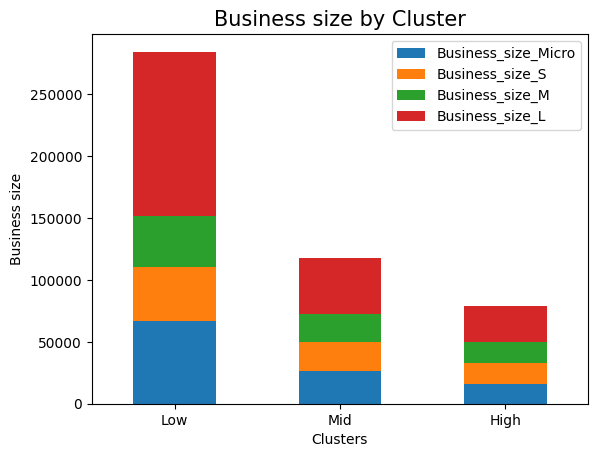

In [ ]:
#bar chart แสดงการเปรียบเทียบขนาดธุรกิจของการส่งออกในแต่ละกลุ่ม
df_size = pd.get_dummies(df_model, columns = ['Business_size'])
df = df_size.groupby('clusters')[['Business_size_Micro', 'Business_size_S', 'Business_size_M', 'Business_size_L']].sum()
new_index = ['Low', 'Mid', 'High']
df = df.reindex(new_index)
plt.figure(figsize=(20,10))
df.plot(kind='bar', stacked=True)

plt.title('Business size by Cluster', fontsize=15)
plt.xlabel('Clusters', fontsize=10)
plt.ylabel('Business size', fontsize=10);
plt.xticks(rotation=0, ha='center');

In [ ]:
df

,Business_size_Micro,Business_size_S,Business_size_M,Business_size_L
clusters,,,,
Low,66997,43733,40906,132769
Mid,26593,23015,22925,44901
High,16273,16506,17358,29107
